In [8]:
import numpy as np
import matplotlib.pyplot as plt

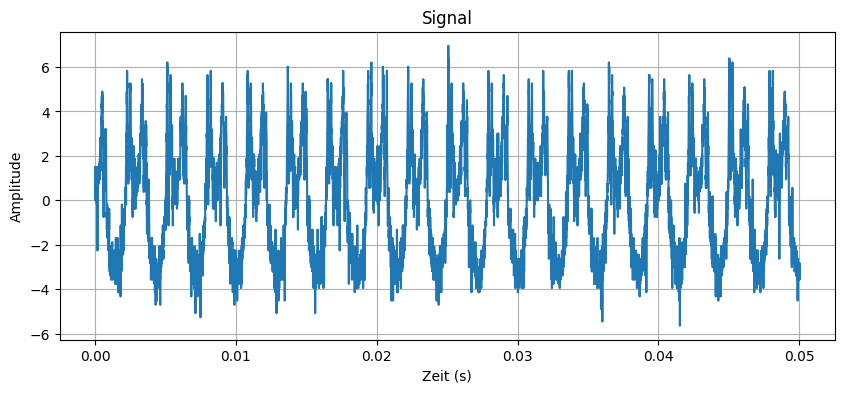

Grundperiode: 2.61ms
Grundfrequenz: 383.14177125996 Hz
Signaldauer: 0.05s
Abtastfrequenz: 200,000hz
Signallänge: 10,004 abtastpunkte
Abtastintervall: 0,05ms


In [9]:
# Laden des Signals
data = np.genfromtxt("ton-1.csv", delimiter=";", skip_header=2)

# Extrahieren von Zeit- und Signaldaten
time = data[:, 0] * 1e-3  # Umwandlung von ms in Sekunden
signal = data[:, 1]

# Angenommene Parameter (falls nicht anders angegeben)
sampling_rate = 200000  # in Hz
dt = 1 / sampling_rate

# Zeitvektor erstellen basierend auf der Länge des Signals
t = np.arange(len(signal)) * dt

# Signal darstellen
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.grid(True)
plt.show()

print("Grundperiode: 2.61ms")
print("Grundfrequenz: 383.14177125996 Hz")
print("Signaldauer: 0.05s")
print("Abtastfrequenz: 200,000hz")
print("Signallänge: 10,004 abtastpunkte")
print("Abtastintervall: 0,05ms")

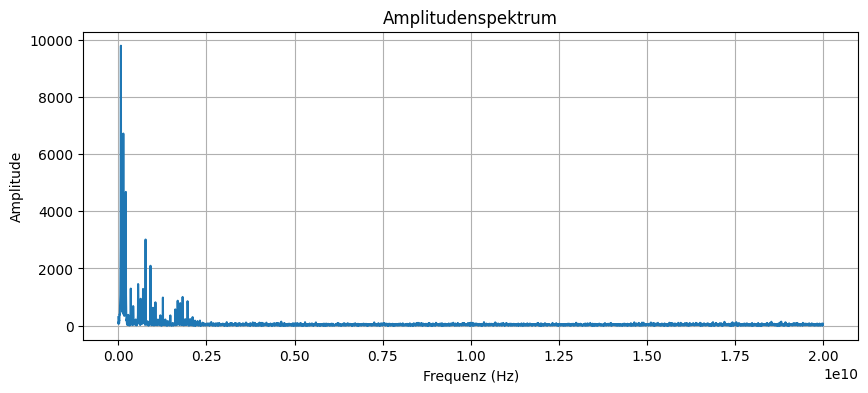

Grundfrequenz: 71971211.51539384 Hz, Amplitude: 9782.841822418437


In [10]:
# Länge des Signals
M = len(signal)

# Fouriertransformation
fft_result = np.fft.fft(signal)

# Amplitudenberechnung
amplitudes = np.abs(fft_result)

# Frequenzvektor erstellen
frequencies = np.fft.fftfreq(M, dt)

# Korrekte Umrechnung der Frequenzen in Hertz
frequencies_in_hz = frequencies * sampling_rate

# Amplitudenspektrum darstellen
plt.figure(figsize=(10, 4))
plt.plot(frequencies_in_hz[:M // 2], amplitudes[:M // 2])
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitudenspektrum')
plt.grid(True)
plt.show()

# Grundfrequenz identifizieren
index_of_max = np.argmax(amplitudes[:M // 2])
fundamental_freq = frequencies_in_hz[index_of_max]
fundamental_amplitude = amplitudes[index_of_max]

print(f"Grundfrequenz: {fundamental_freq} Hz, Amplitude: {fundamental_amplitude}")
